In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, adjusted_rand_score
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

## Data Preprocessing

1. Select features
2. Process selected features
    - create booleans for categorical data
    - deal with NA 
    - scale 

In [2]:
# load data
pac_data = pd.read_csv('../data/processed/pac_data_processed.csv')

In [3]:
pac_data.head()

,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRI,...,technology,travel,is_scam_pac,pct_rec_from_indiv,pct_rec_from_unitem_indiv,pct_disb_to_cand,pct_disb_to_other_pac,pct_disb_to_pty,pct_disb_to_ie,pct_fundraising
0,C00000059,"HALLMARK CARDS, INC. PAC (HALLPAC)",Q,B,M,95727.18,0.00,91727.18,0.0,0.0,...,NaN,NaN,0,0.958215,0.304809,0.723404,0.106383,NaN,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,Q,B,M,2096337.89,0.00,1666298.01,0.0,0.0,...,NaN,NaN,0,0.794861,0.174361,0.188207,0.089069,0.022887,NaN,0.001093
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,N,U,Q,66734.55,56873.30,0.00,0.0,0.0,...,NaN,NaN,0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,C00000729,AMERICAN DENTAL ASSOCIATION POLITICAL ACTION C...,Q,B,M,2187609.33,22478.85,2086690.47,0.0,0.0,...,NaN,NaN,0,0.953868,0.372118,0.572650,0.387304,NaN,NaN,0.013485
4,C00000885,INTERNATIONAL UNION OF PAINTERS AND ALLIED TRA...,Q,B,M,5525285.55,0.00,5306388.90,0.0,0.0,...,NaN,NaN,0,0.960383,0.886998,0.244442,0.160283,0.026968,NaN,NaN


In [4]:
pac_data.columns


Index(['CMTE_ID', 'CMTE_NM', 'CMTE_TP', 'CMTE_DSGN', 'CMTE_FILING_FREQ',
       'TTL_RECEIPTS', 'TRANS_FROM_AFF', 'INDV_CONTRIB',
       'OTHER_POL_CMTE_CONTRIB', 'CAND_CONTRI', 'CAND_LOANS',
       'TTL_LOANS_RECEIVED', 'TTL_DISB', 'TRANF_TO_AFF', 'INDV_REFUNDS',
       'OTHER_POL_CMTE_REFUNDS', 'CAND_LOAN_REPAY', 'LOAN_REPAY', 'COH_BOP',
       'COH_COP', 'DEBTS_OWED_BY', 'NONFED_TRANS_RECEIVED',
       'CONTRIB_TO_OTHER_CMTE', 'IND_EXP', 'PTY_COORD_EXP', 'NONFED_SHARE_EXP',
       'CVG_END_DT', 'cmte_id_x', 'n_vendors', 'pct_to_top_vendor',
       'n_vendors_50_pct', 'n_vendors_75_pct', 'n_vendors_90_pct',
       'ttl_expenditures', 'n_opp_vendors', 'pct_to_top_opp_vendor',
       'n_opp_vendors_50_pct', 'n_opp_vendors_75_pct', 'n_opp_vendors_90_pct',
       'ttl_opp_expenditures', 'CAN', 'IND', 'PAC', 'PTY', 'cmte_id_y',
       'se_amt', 'committee_id', 'individual_unitemized_contributions',
       'individual_itemized_contributions', 'individual_contributions',
       'Unnamed: 0'

In [6]:
pac_data_small = pac_data[[
 'CMTE_ID'
, 'CMTE_TP'
, 'CMTE_DSGN'
, 'n_vendors'
, 'pct_to_top_vendor'
, 'n_vendors_50_pct'
, 'pct_rec_from_unitem_indiv'
, 'pct_disb_to_cand'
, 'pct_disb_to_other_pac'
, 'pct_disb_to_pty'
, 'pct_disb_to_ie'
, 'pct_fundraising'
, 'is_scam_pac']].copy()

string_columns = ['CMTE_TP', 'CMTE_DSGN']

# Initialize encoder 
encoder = OneHotEncoder(sparse_output=False) 
encoded_array = encoder.fit_transform(pac_data_small[string_columns])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(string_columns), index=pac_data_small.index)

# Concatenate with original numeric columns
pac_data_small_encoded = pd.concat([pac_data_small.drop(columns=string_columns), encoded_df], axis=1)

print(pac_data_small_encoded)


        CMTE_ID  n_vendors  pct_to_top_vendor  n_vendors_50_pct  \
0     C00000059       33.0           0.133333              10.0   
1     C00000422      232.0           0.151899              36.0   
2     C00000489        4.0           0.816034               1.0   
3     C00000729      384.0           0.032991              95.0   
4     C00000885      507.0           0.156152              47.0   
...         ...        ...                ...               ...   
7868  C00542464       13.0           0.730463               1.0   
7869  C00542514        7.0           0.250000               3.0   
7870  C00542530        NaN                NaN               NaN   
7871  C00542555        4.0           0.579710               1.0   
7872  C00542589        2.0           0.541469               1.0   

      pct_rec_from_unitem_indiv  pct_disb_to_cand  pct_disb_to_other_pac  \
0                      0.304809          0.723404               0.106383   
1                      0.174361          0.

In [7]:
pac_data_small_encoded.columns

Index(['CMTE_ID', 'n_vendors', 'pct_to_top_vendor', 'n_vendors_50_pct',
       'pct_rec_from_unitem_indiv', 'pct_disb_to_cand',
       'pct_disb_to_other_pac', 'pct_disb_to_pty', 'pct_disb_to_ie',
       'pct_fundraising', 'is_scam_pac', 'CMTE_TP_N', 'CMTE_TP_O', 'CMTE_TP_Q',
       'CMTE_TP_V', 'CMTE_TP_W', 'CMTE_DSGN_B', 'CMTE_DSGN_D', 'CMTE_DSGN_J',
       'CMTE_DSGN_P', 'CMTE_DSGN_U'],
      dtype='object')

In [8]:
pac_data_small_encoded.isna().sum()

CMTE_ID                         0
n_vendors                     763
pct_to_top_vendor             767
n_vendors_50_pct              767
pct_rec_from_unitem_indiv       0
pct_disb_to_cand             3729
pct_disb_to_other_pac        4202
pct_disb_to_pty              6518
pct_disb_to_ie               7007
pct_fundraising              3301
is_scam_pac                     0
CMTE_TP_N                       0
CMTE_TP_O                       0
CMTE_TP_Q                       0
CMTE_TP_V                       0
CMTE_TP_W                       0
CMTE_DSGN_B                     0
CMTE_DSGN_D                     0
CMTE_DSGN_J                     0
CMTE_DSGN_P                     0
CMTE_DSGN_U                     0
dtype: int64

In [9]:
pac_data_small_encoded.fillna(0, inplace=True)

In [10]:
pac_data_small_encoded.isna().sum()

CMTE_ID                      0
n_vendors                    0
pct_to_top_vendor            0
n_vendors_50_pct             0
pct_rec_from_unitem_indiv    0
pct_disb_to_cand             0
pct_disb_to_other_pac        0
pct_disb_to_pty              0
pct_disb_to_ie               0
pct_fundraising              0
is_scam_pac                  0
CMTE_TP_N                    0
CMTE_TP_O                    0
CMTE_TP_Q                    0
CMTE_TP_V                    0
CMTE_TP_W                    0
CMTE_DSGN_B                  0
CMTE_DSGN_D                  0
CMTE_DSGN_J                  0
CMTE_DSGN_P                  0
CMTE_DSGN_U                  0
dtype: int64

In [11]:
pac_data_small_encoded.describe()

,n_vendors,pct_to_top_vendor,n_vendors_50_pct,pct_rec_from_unitem_indiv,pct_disb_to_cand,pct_disb_to_other_pac,pct_disb_to_pty,pct_disb_to_ie,pct_fundraising,is_scam_pac,CMTE_TP_N,CMTE_TP_O,CMTE_TP_Q,CMTE_TP_V,CMTE_TP_W,CMTE_DSGN_B,CMTE_DSGN_D,CMTE_DSGN_J,CMTE_DSGN_P,CMTE_DSGN_U
count,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000,7873.000000
mean,38.611838,0.409655,5.530039,0.161388,0.210134,0.108291,0.026262,0.051080,0.115686,0.002032,0.321097,0.201956,0.396418,0.064143,0.016385,0.178712,0.097041,0.118379,0.000381,0.605487
std,130.664385,0.334470,12.377208,0.279099,0.283227,0.206958,0.103530,0.184937,0.235121,0.045038,0.466928,0.401485,0.489184,0.245024,0.126959,0.383135,0.296032,0.323077,0.019518,0.488777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.110750,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.337261,2.000000,0.007420,0.016484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31.000000,0.657818,5.000000,0.188617,0.389657,0.128205,0.000000,0.000000,0.101339,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,6928.000000,1.000000,306.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
y = pac_data_small_encoded['CMTE_ID']
X = pac_data_small_encoded.drop(['CMTE_ID','is_scam_pac'], axis = 1
                                )
X = X[['pct_fundraising'
       , 'pct_rec_from_unitem_indiv'
       , 'pct_disb_to_cand'
       , 'pct_disb_to_other_pac'
       , 'pct_disb_to_pty'
       , 'pct_disb_to_ie'
       , 'pct_to_top_vendor'
       , 'n_vendors_50_pct'
       , 'CMTE_TP_N'
       , 'CMTE_TP_O'
       , 'CMTE_TP_Q'
       , 'CMTE_TP_V'
       , 'CMTE_TP_W'
       , 'CMTE_DSGN_B'
       , 'CMTE_DSGN_D'
       , 'CMTE_DSGN_J'
       , 'CMTE_DSGN_P'
       , 'CMTE_DSGN_U']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled

array([[-0.49205803,  0.51390242,  1.81233885, ..., -0.36643499,
        -0.0195242 , -1.23885891],
       [-0.48741079,  0.04648316, -0.07742276, ..., -0.36643499,
        -0.0195242 , -1.23885891],
       [-0.49205803, -0.57828387, -0.7419762 , ..., -0.36643499,
        -0.0195242 ,  0.80719442],
       ...,
       [-0.49205803,  3.00489943, -0.7419762 , ..., -0.36643499,
        -0.0195242 ,  0.80719442],
       [-0.49205803, -0.57828387, -0.2125195 , ..., -0.36643499,
        -0.0195242 , -1.23885891],
       [ 1.45825991, -0.57828387, -0.7419762 , ..., -0.36643499,
        -0.0195242 ,  0.80719442]])

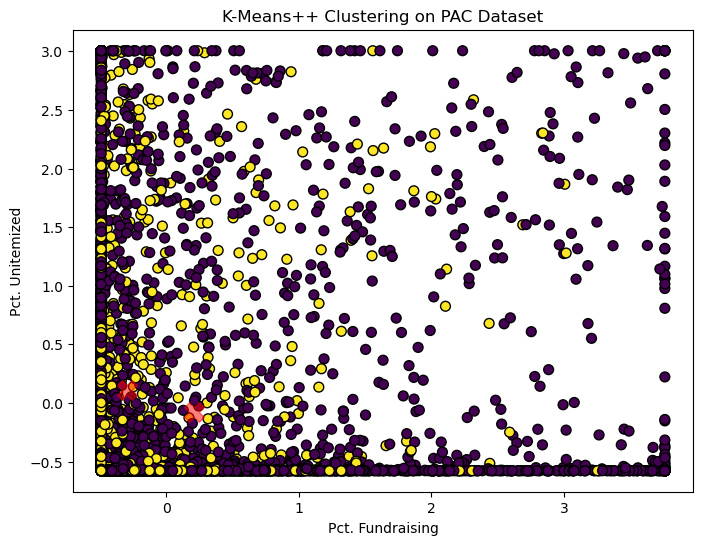

In [14]:
# K-Means++
kmeans_plus = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=10) 
kmeans_plus.fit(X_scaled)
y_kmeans_plus = kmeans_plus.predict(X_scaled)

# Plotting K-Means++
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_plus, cmap='viridis', edgecolor='k', s=50)
centers = kmeans_plus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('K-Means++ Clustering on PAC Dataset')
plt.xlabel('Pct. Fundraising')
plt.ylabel('Pct. Unitemized')
plt.show()


In [15]:
if len(y_kmeans_plus) == len(pac_data_small_encoded):
    pac_data_small_encoded['clusters_1'] = y_kmeans_plus
else: 
    raise ValueError("Array length does not match DataFrame row count")

if len(y_kmeans_plus) == len(pac_data_small):
    pac_data_small['clusters_1'] = y_kmeans_plus
else: 
    raise ValueError("Array length does not match DataFrame row count")


In [83]:
pac_data_small[['CMTE_ID','pct_rec_from_unitem_indiv','pct_fundraising','clusters_1','is_scam_pac']].sort_values('pct_fundraising', ascending=False).query('is_scam_pac==1')

,CMTE_ID,pct_rec_from_unitem_indiv,pct_fundraising,clusters_1,is_scam_pac
3616,C00710160,0.993025,0.927134,0,1
6867,C00681825,0.947461,0.899139,0,1
6905,C00709113,1.000000,0.828361,0,1
3035,C00570416,0.743831,0.813182,0,1
2821,C00540229,0.659975,0.618508,0,1
1175,C00298000,0.717084,0.459556,0,1
3226,C00622464,1.000000,0.393212,0,1
6678,C00742296,0.000000,0.319968,0,1
3617,C00710178,0.951857,0.317509,0,1
6570,C00653386,0.909326,0.258208,0,1


In [84]:
pac_data_small[['CMTE_ID','pct_rec_from_unitem_indiv','pct_fundraising','clusters_1','is_scam_pac']].query('pct_fundraising>.5 and pct_fundraising<1').sort_values('pct_fundraising', ascending=False)

,CMTE_ID,pct_rec_from_unitem_indiv,pct_fundraising,clusters_1,is_scam_pac
3560,C00696112,0.728007,1.000000,0,0
4037,C00813212,0.486865,1.000000,0,0
5466,C00767749,0.015893,0.999872,0,0
5594,C00888321,0.002771,0.999791,0,0
4127,C00827519,0.014903,0.999047,0,0
...,...,...,...,...,...
3155,C00605410,0.059634,0.505311,1,0
4270,C00821587,0.000000,0.503416,0,0
3305,C00638320,0.522508,0.501456,0,0
1283,C00325639,0.768170,0.500984,1,0


In [85]:
pac_data_small['sort_test'] = pac_data_small['pct_rec_from_unitem_indiv']+pac_data_small['pct_fundraising']

In [95]:
pac_data_small.groupby('clusters_1').CMTE_ID.nunique()[0]/pac_data_small.CMTE_ID.nunique()

0.5941826495617935

In [99]:
pac_data_small[[  'pct_rec_from_unitem_indiv','pct_fundraising',
                'pct_disb_to_cand',
       'pct_disb_to_other_pac', 'pct_disb_to_pty', 'pct_disb_to_ie','n_vendors', 'pct_to_top_vendor',
       'n_vendors_50_pct',  
         'clusters_1']].groupby('clusters_1').mean().transpose()

clusters_1,0,1
pct_rec_from_unitem_indiv,0.139406,0.193573
pct_fundraising,0.229590,0.116763
pct_disb_to_cand,0.338426,0.430952
pct_disb_to_other_pac,0.266888,0.211111
pct_disb_to_pty,0.266919,0.081393
pct_disb_to_ie,0.500027,0.118900
n_vendors,22.175119,69.270679
pct_to_top_vendor,0.606320,0.257319
n_vendors_50_pct,1.897551,11.579897


In [100]:
pac_data_small[[  'pct_rec_from_unitem_indiv','pct_fundraising',
                'pct_disb_to_cand',
       'pct_disb_to_other_pac', 'pct_disb_to_pty', 'pct_disb_to_ie','n_vendors', 'pct_to_top_vendor',
       'n_vendors_50_pct',  
       'is_scam_pac']].groupby('is_scam_pac').mean().transpose()

is_scam_pac,0,1
pct_rec_from_unitem_indiv,0.160385,0.654247
pct_fundraising,0.198466,0.425598
pct_disb_to_cand,0.399413,0.009451
pct_disb_to_other_pac,0.232343,0.142621
pct_disb_to_pty,0.152805,0.007827
pct_disb_to_ie,0.468047,0.070886
n_vendors,42.563998,127.625000
pct_to_top_vendor,0.453998,0.397683
n_vendors_50_pct,6.135261,2.437500


## Attempt two with less features 

In [16]:
X = pac_data_small_encoded.drop(['CMTE_ID','is_scam_pac'], axis = 1
                                )
X = X[['pct_fundraising'
       , 'pct_rec_from_unitem_indiv'
       , 'pct_disb_to_cand'
       , 'pct_disb_to_other_pac'
       , 'pct_disb_to_pty'
       , 'pct_disb_to_ie'
]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

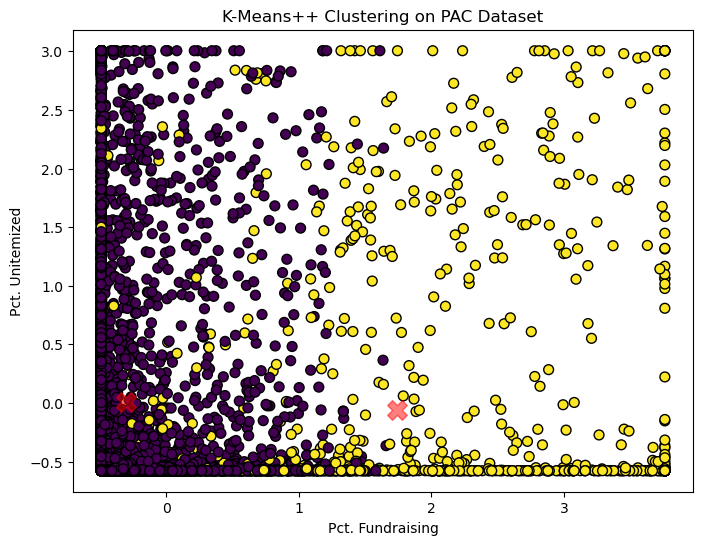

In [17]:
# K-Means++
kmeans_plus = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=10) 
kmeans_plus.fit(X_scaled)
y_kmeans_plus = kmeans_plus.predict(X_scaled)

# Plotting K-Means++
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_plus, cmap='viridis', edgecolor='k', s=50)
centers = kmeans_plus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('K-Means++ Clustering on PAC Dataset')
plt.xlabel('Pct. Fundraising')
plt.ylabel('Pct. Unitemized')
plt.show()

In [18]:
if len(y_kmeans_plus) == len(pac_data_small_encoded):
    pac_data_small_encoded['clusters_2'] = y_kmeans_plus
else: 
    raise ValueError("Array length does not match DataFrame row count")

if len(y_kmeans_plus) == len(pac_data_small):
    pac_data_small['clusters_2'] = y_kmeans_plus
else: 
    raise ValueError("Array length does not match DataFrame row count")


In [20]:
pac_data_small[['CMTE_ID','pct_rec_from_unitem_indiv','pct_fundraising','clusters_2','is_scam_pac']].sort_values('pct_fundraising', ascending=False).query('is_scam_pac==1')

,CMTE_ID,pct_rec_from_unitem_indiv,pct_fundraising,clusters_2,is_scam_pac
3616,C00710160,0.993025,0.927134,1,1
6867,C00681825,0.947461,0.899139,1,1
6905,C00709113,1.000000,0.828361,1,1
3035,C00570416,0.743831,0.813182,1,1
2821,C00540229,0.659975,0.618508,1,1
1175,C00298000,0.717084,0.459556,1,1
3226,C00622464,1.000000,0.393212,0,1
6678,C00742296,0.000000,0.319968,0,1
3617,C00710178,0.951857,0.317509,0,1
6570,C00653386,0.909326,0.258208,0,1


In [23]:
pac_data_small[['CMTE_ID','pct_rec_from_unitem_indiv','pct_fundraising','clusters_2','is_scam_pac']].query('pct_fundraising>.5 and pct_fundraising<1 and pct_rec_from_unitem_indiv>.7' ).sort_values('pct_fundraising', ascending=False).head(25)

,CMTE_ID,pct_rec_from_unitem_indiv,pct_fundraising,clusters_2,is_scam_pac
3560,C00696112,0.728007,1.000000,1,0
4527,C00792192,1.000000,0.987130,1,0
5729,C00883561,0.909694,0.969592,1,0
6601,C00715433,0.985179,0.964926,1,0
2527,C00491175,0.982379,0.951973,1,0
7805,C00889782,0.875608,0.939219,1,0
3616,C00710160,0.993025,0.927134,1,1
6867,C00681825,0.947461,0.899139,1,1
7065,C00813873,1.000000,0.884243,1,0
5561,C00887588,0.839212,0.875111,1,0


This is much better, but there is some data quality issue with the pct fundraising - in that it seems to include some SE data. It's possible these pacs miss filed, and filed these expenses both as SE and SB lineitems. However, I could have acheived similar results without clustering, by simply querying the underlying dataset. 

In [25]:
pac_data_small.to_csv('../data/processed/clusters_results.csv', index=False)